# 第3章 k近邻法

**算法3.1（k近邻法）**

输入：
- 训练数据集
$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$，
其中，$x_i \in \mathcal{X} \subseteq R^n$为实例的特征向量，$y_i \in \mathcal{Y} = \{c_1,c_2,...,c_K\}$为实例的类别，$i=1,2,...,N$
- 实例特征向量$x$

输出：
- 实例$x$所属的类$y$

(1)根据给定的距离度量，在训练集$T$中找出与$x$最近邻的$k$个点，涵盖这$k$个点的$x$的邻域记作$N_k(x)$

(2)在$N_k(x)$中根据分类决策规则（如多数表决）决定$x$的类别$y$:
$$y=\arg \max_{c_j} \sum_{x_i \in N_k(x)} I(y_i = c_j), i=1,2,...,N;j=1,2,...,K$$
其中$I$为指示函数，当$y_i = c_j$时$I$为1，否则为0。

## k近邻模型

三个基本要素

### 1. 距离度量

设特征空间$x$是$n$维实数向量空间 ，$x_{i}, x_{j} \in \mathcal{X}$,$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$,$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}$
，则：$x_i$,$x_j$的$L_p$距离定义为:


$L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{i=1}^{n}\left|x_{i}^{(i)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$

- $p= 1$  曼哈顿距离
- $p= 2$  欧氏距离
- $p= inf$   闵式距离minkowski_distance 

### 2. k值的选择

- k值的减小意味着整体模型变得复杂，容易发生过拟合
- k值的增大意味着整体的模型变得简单

### 3. 分类决策规则

多数表决规则

**例3.1**

求$p$不同时，$L_p$距离下$x_1$的最近邻点

In [1]:
import math

In [2]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [3]:
# 计算向量x和y的p范数
def L(x, y, p=2):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    return 0

In [4]:
for p in range(1, 5):
    ret = {'x2':L(x1, x2, p), 'x3':L(x1, x3, p)}
    print(min(zip(ret.values(), ret.keys())))

(4.0, 'x2')
(4.0, 'x2')
(3.7797631496846193, 'x3')
(3.5676213450081633, 'x3')


### k近邻的$O(kn)$实现

使用iris数据集中的[sepal length，sepal width]作为特征

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
iris = load_iris()
data = iris['data']
target = iris['target']

X = data[:, :2]
Y = target
print('X shape', X.shape)
print('Y shape', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print('X_train shape', X_train.shape)
print('Y_train shape', Y_train.shape)
print('X_test shape', X_test.shape)
print('Y_test shape', Y_test.shape)

X shape (150, 2)
Y shape (150,)
X_train shape (120, 2)
Y_train shape (120,)
X_test shape (30, 2)
Y_test shape (30,)


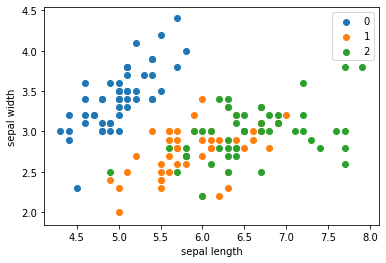

In [7]:
plt.scatter(X[:50, 0], X[:50, 1], label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.scatter(X[100:150, 0], X[100:150, 1], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [8]:
class KNN:
    def __init__(self, X_train, Y_train, k=3, p=2):
        '''
        parameter k: 近邻点个数
        parameter p：度量距离范数
        '''
        self.X_train = X_train
        self.Y_train = Y_train
        self.k = k
        self.p = p
        
    def predict(self, x):
        '''
        parameter X_train: 训练数据集，训练样本数 * 维度
        parameter Y_train：训练数据集标签
        parameter X_test: 测试数据
        return: 测试数据标签
        '''
        dist_list = []
        cnt = {}
        for i in range(len(self.Y_train)):
            dist = np.linalg.norm(x-self.X_train[i], ord=self.p)
            dist_list.append((dist, self.Y_train[i]))
            cnt[Y_train[i]] = 0
        for i in range(self.k):
            min_dist = dist_list[i][0]
            min_index = i
            for j in range(i+1, len(self.Y_train)):
                if dist_list[j][0] < min_dist:
                    min_dist = dist_list[j][0]
                    min_index = j
            dist_list[i], dist_list[min_index] = dist_list[min_index], dist_list[i]
            cnt[dist_list[i][1]] += 1
        # 获取k近邻点中类别最多的标签
        y = max(cnt, key=cnt.get)
        return y
    
    def source(self, X_test, Y_test):
        right_cnt = 0
        for i in range(len(Y_test)):
            y = self.predict(X_test[i])
            if y == Y_test[i]:
                right_cnt += 1
        return right_cnt / len(Y_test)

In [9]:
knn = KNN(X_train, Y_train)
print('accuracy:', knn.source(X_test, Y_test))

accuracy: 0.7666666666666667


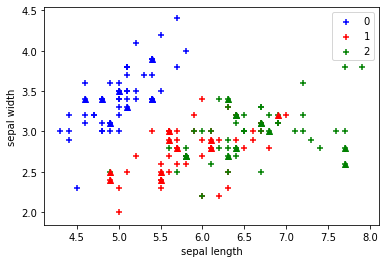

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], c='b', marker='+', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], c='r', marker='+', label='1')
plt.scatter(X[100:150, 0], X[100:150, 1], c='g', marker='+', label='2')
for i in range(len(X_test)):
    label = knn.predict(X_test[i])
    if label == 0:
        plt.scatter(X_test[i][0], X_test[i][1], c='b', marker='^')
    elif label == 1:
        plt.scatter(X_test[i][0], X_test[i][1], c='r', marker='^')
    elif label == 2:
        plt.scatter(X_test[i][0], X_test[i][1], c='g', marker='^')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

### scikit-learn实现

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
clf_sk = KNeighborsClassifier(n_neighbors=3)
clf_sk.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
clf_sk.score(X_test, Y_test)

0.7666666666666667

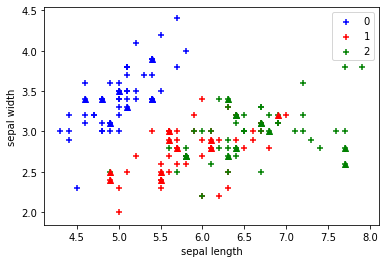

In [14]:
plt.scatter(X[:50, 0], X[:50, 1], c='b', marker='+', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], c='r', marker='+', label='1')
plt.scatter(X[100:150, 0], X[100:150, 1], c='g', marker='+', label='2')
for i in range(len(X_test)):
    label = clf_sk.predict([X_test[i]])[0]
    if label == 0:
        plt.scatter(X_test[i][0], X_test[i][1], c='b', marker='^')
    elif label == 1:
        plt.scatter(X_test[i][0], X_test[i][1], c='r', marker='^')
    elif label == 2:
        plt.scatter(X_test[i][0], X_test[i][1], c='g', marker='^')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## kd 树